рассчёт самого длинного. Как оказалось это что-то не то вообще)

In [2]:
emotion_long = emotion_23.comment.max()
len(emotion_long)

NameError: name 'emotion_23' is not defined

In [ ]:
# sns.countplot(emotion_23['comment'])

начинаю работу над датасетом для нахождения длины, чтобы в будущем отсортировать значения

In [ ]:
emotion_lens = emotion_23.applymap(len)

emotion_lens

C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1603101207.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emotion_lens = emotion_23.applymap(len)


,comment,emotion
0,322,12
1,2158,12
2,274,12
3,658,12
4,1136,12
...,...,...
63556,16,7
63557,30,4
63558,123,4
63559,122,9


<Axes: xlabel='comment', ylabel='Count'>

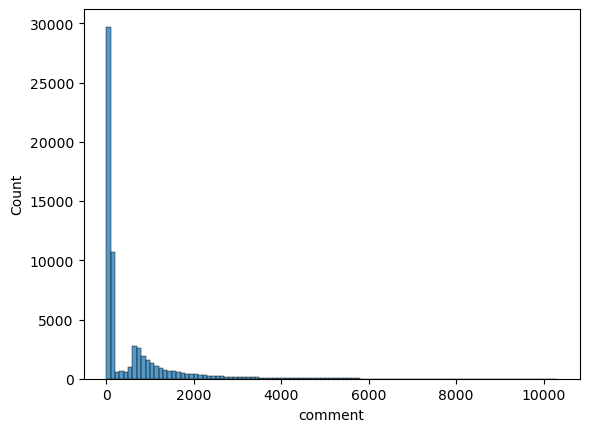

In [ ]:
sns.histplot(emotion_lens['comment'], binwidth=100)

In [ ]:
emotion_lens = emotion_lens[emotion_lens['comment'] >= 200]
emotion_lens = emotion_lens[emotion_lens['comment'] <= 500]

отрезаю часть

In [ ]:
emotion_lens

,comment,emotion
0,322,12
2,274,12
8,483,7
18,252,7
19,357,7
...,...,...
23631,207,4
23632,483,4
23634,405,4
23635,421,4


<Axes: xlabel='comment', ylabel='Count'>

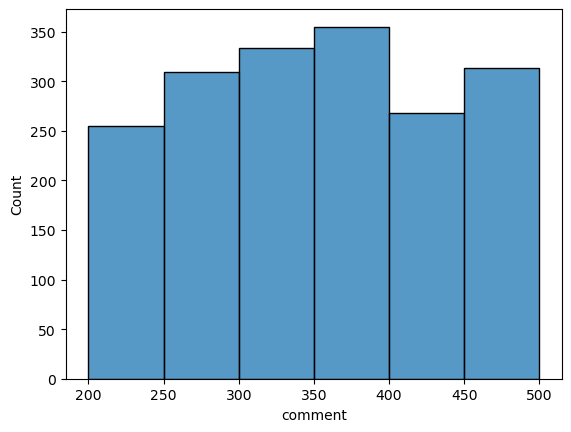

In [ ]:
sns.histplot(emotion_lens['comment'], binwidth=50)

план

1. сделать выборку по количеству слов.
2. самостоятельно просмотреть часть данных на "качество"
3. сохранить выборку и отправить в обработку ИИ
4. Проверить работоспособность ИИ в дуэте с данными

In [ ]:
emotion_lens = emotion_23.applymap(len)

emotion_lens

C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1603101207.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emotion_lens = emotion_23.applymap(len)


,comment,emotion
0,322,12
1,2158,12
2,274,12
3,658,12
4,1136,12
...,...,...
63556,16,7
63557,30,4
63558,123,4
63559,122,9


привел к нормальному виду, чтобы можно было работать далее

In [ ]:
emotion_lens.columns = ['com_len', 'emotion']

emotion_lens['comment'] = emotion_23['comment']

emotion_lens['emotion'] = emotion_23['emotion']

emotion_lens

,com_len,emotion,comment
0,322,anticipation,"It had some laughs, but overall the motivation..."
1,2158,anticipation,"WAITING TO EXHALE Waiting, and waiting, and wa..."
2,274,anticipation,"Angela Basset was good as expected, but Whitne..."
3,658,anticipation,"The movie is okay, mediocre might even be the ..."
4,1136,anticipation,I got an opportunity to see Waiting To Exhale ...
...,...,...,...
63556,16,neutral,@JohnLloydTaylor
63557,30,love,Happy Mothers Day All my love
63558,123,love,Happy Mother's Day to all the mommies out ther...
63559,122,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


Если считать что средняя длина слова примерно 6-7 символов на английском, то получается такое

Вокруг темный, серый воздух. Ветер шумит, кружит листья. Ранний снежок слегка покрывает землю. Люди спешат домой, греют ладони. Дома тепло, уютно. Можно читать новый роман, пить горячий, сладкий кофе, слушать музыку. Такое время. Оно дарит покой, тихое счастье, момент отдыха после работы. Весь день дарил заботы, теперь нужен отдых. Жизнь имеет такие моменты.

Данный текст достаточно большой, и для описания своего состояния при запросе в наш продукт этого будет вполне достаточно.

То есть 

6 * 50 слов = 300 символов

7 * 60 слов = 420 символов

Этого диапазона слов должно вполне хватить для описания.

Это всё сделано для выборки

In [ ]:
emotion_lens_t = emotion_lens[emotion_lens['com_len'] >= 300]
emotion_lens_t = emotion_lens_t[emotion_lens_t['com_len'] <= 420]

emotion_lens_t

,com_len,emotion,comment
0,322,anticipation,"It had some laughs, but overall the motivation..."
19,357,sadness,I really enjoyed this movie! It's the kind of ...
65,383,fear,"Tom and Huck isn't a great movie, but it's a g..."
103,372,sadness,This is a great movie to watch when you're hav...
104,372,optimism,This is a great movie to watch when you're hav...
...,...,...,...
23604,373,sadness,"I like movies like this. It's slow, kinda. It'..."
23608,328,sadness,seem like a low budget but the main actors are...
23621,306,fear,This is pretty mediocre and bad.First the acti...
23628,395,fear,This movie isn't as bad as several reviewers s...


Получилос всего 800 строк. Можно добавить до 1000-1200

In [ ]:
emotion_lens_t_1 = emotion_lens[emotion_lens['com_len'] >= 280]
emotion_lens_t_1 = emotion_lens_t_1[emotion_lens['com_len'] <= 460]

emotion_lens_t_1

C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\2281918794.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emotion_lens_t_1 = emotion_lens_t_1[emotion_lens['com_len'] <= 460]


,com_len,emotion,comment
0,322,anticipation,"It had some laughs, but overall the motivation..."
19,357,sadness,I really enjoyed this movie! It's the kind of ...
24,292,sadness,This movie is great! I think it's one of the ...
38,282,anticipation,Ever wonder what Kenny G would look like if he...
39,282,joy,Ever wonder what Kenny G would look like if he...
...,...,...,...
23621,306,fear,This is pretty mediocre and bad.First the acti...
23627,290,fear,A great Netflix original film. While it's clic...
23628,395,fear,This movie isn't as bad as several reviewers s...
23634,405,fear,Say what you want to about the movie. It was a...


Вполне хорошо.

Сравним сколько потеряли значений эмоций

In [ ]:
emotion_23.emotion.unique()

array(['anticipation', 'sadness', 'disgust', 'joy', 'fear', 'optimism',
       'anger', 'surprise', 'empty', 'enthusiasm', 'neutral', 'worry',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief'],
      dtype=object)

In [ ]:
emotion_lens = emotion_lens_t_1

emotion_lens.emotion.unique()

array(['anticipation', 'sadness', 'joy', 'fear', 'optimism', 'anger',
       'disgust'], dtype=object)

In [ ]:
emotion_23.emotion.nunique() - emotion_lens.emotion.nunique()

11

11 значений :(

Значит по-другому

1. сделаем выборку из эмоций
2. какие-то объединим
3. какие-то не будем учитывать в результате
4. в зависимости от потерь, либо добавим что-то просто либо уберём

сейчас просмотрим что получилось из моих действий

<Axes: xlabel='count', ylabel='emotion'>

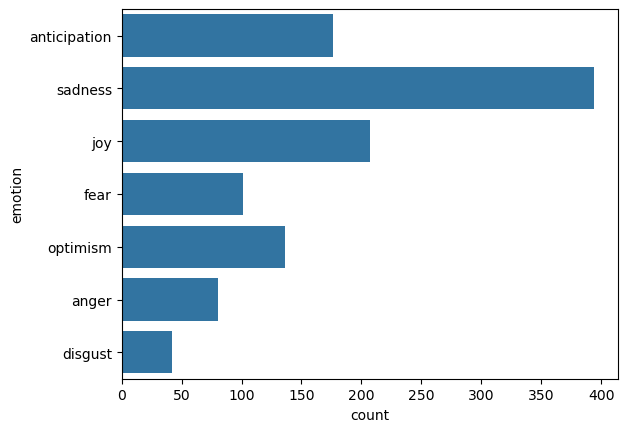

In [ ]:
sns.countplot(emotion_lens['emotion'])

['anticipation', 'sadness', 'disgust', 'joy', 'fear', 'optimism',
       'anger', 'surprise', 'empty', 'enthusiasm', 'neutral', 'worry',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief']

[«предвкушение», «грусть», «отвращение», «радость», «страх», «оптимизм»,
«гнев», «удивление», «пустота», «энтузиазм», «нейтральность», «беспокойство»,
«любовь», «веселье», «ненависть», «счастье», «скука», «облегчение»]

«предвкушение»       -             1

«грусть»,            +

«отвращение»,        --+           2

«радость»,           +

«страх»,             +

«оптимизм»,          +- в радость  3

«гнев»,              +

«удивление»,         --+           4

«пустота»,           -             5

«энтузиазм»,         +- в радость  6

«нейтральность»,     +

«беспокойство»,      +

«любовь»,            +

«веселье»,           +

«ненависть»,         + в гнев      7

«счастье»,           + в радость   8

«скука»,             +

«облегчение»         -             9

По итогу: -9

Остаётся 


In [ ]:
emotion_23.emotion.nunique() - 9

9

[_'sadness'_, _'optimism'_, _'fear'_, _'anger'_,   'neutral'  ,   'worry'  , 'love',   'fun'   ,   'boredom']

['anticipation', _'sadness'_, 'joy', _'fear'_, _'optimism'_, _'anger'_, 'disgust']

разница в  ['neutral'  ,   'worry'  , 'love',   'fun'   ,   'boredom']

In [ ]:
emotion_part_neutral = emotion_23[emotion_23['emotion']=='neutral']
emotion_part_worry = emotion_23[emotion_23['emotion']=='worry']
emotion_part_love = emotion_23[emotion_23['emotion']=='love']
emotion_part_fun = emotion_23[emotion_23['emotion']=='fun']
emotion_part_boredom = emotion_23[emotion_23['emotion']=='boredom']

for i in [emotion_part_neutral, emotion_part_worry, emotion_part_love, emotion_part_fun, emotion_part_boredom]:
    print(len(i))

8617
8452
3801
1776
179


Из этого можно выбрать хорошие разные качественные отзывы

Глобально сейчас сдлеаю выборку по 9 эмоциям.
По 150 отзывов будет 1350 строк базы данных

In [ ]:
emotion_part_sadnes = emotion_23[emotion_23['emotion']=='sadness']
emotion_part_fear = emotion_23[emotion_23['emotion']=='fear']
emotion_part_optimism = emotion_23[emotion_23['emotion']=='optimism']
emotion_part_anger = emotion_23[emotion_23['emotion']=='anger']

for i in [emotion_part_sadnes, emotion_part_fear, emotion_part_optimism, emotion_part_anger]:
    print(len(i))




13856
1884
2682
1595


отсортируем выборки по количеству слов и возьмём по 150 самых больших по длине

In [ ]:
e_list = [emotion_part_anger, emotion_part_boredom, emotion_part_fear, emotion_part_fun, emotion_part_worry, emotion_part_love, emotion_part_neutral, emotion_part_optimism, emotion_part_sadnes]


In [ ]:
e_list[0]

,comment,emotion
197,What a sophomoric action-adventure story this ...,anger
198,"Stupid hackneyed movie, totally not worth your...",anger
199,Broken Arrow is nothing but a typical Hollywoo...,anger
200,John Travolta stars in this mindless thriller ...,anger
201,Like nearly every other in this genre BROKEN A...,anger
...,...,...
58367,my gawwddd ! 6 headshotss inna row? im on fyaa...,anger
58762,I'm way to sleepy.. Ill watch my shows lata..G...,anger
59509,@NerdIndian Take that back. I am insulted.,anger
59806,@anieszkaa haha i did a ltiitle bit yesterday ...,anger


In [ ]:
i=0
for e in e_list:
    e_clone = e.copy()
    e = e.applymap(len)

    e = e['comment']
    e = pd.DataFrame(e)
    e.columns = ['com_len']
    
    e['emotion'] = e_clone['emotion']
    print(e ['emotion'])

    e['comment'] = e_clone['comment']

    print(e['comment'])

    e_list[i] = pd.DataFrame(e)
    i+=1
    


197      anger
198      anger
199      anger
200      anger
201      anger
         ...  
58367    anger
58762    anger
59509    anger
59806    anger
62791    anger
Name: emotion, Length: 1595, dtype: object
197      What a sophomoric action-adventure story this ...
198      Stupid hackneyed movie, totally not worth your...
199      Broken Arrow is nothing but a typical Hollywoo...
200      John Travolta stars in this mindless thriller ...
201      Like nearly every other in this genre BROKEN A...
                               ...                        
58367    my gawwddd ! 6 headshotss inna row? im on fyaa...
58762    I'm way to sleepy.. Ill watch my shows lata..G...
59509           @NerdIndian Take that back. I am insulted.
59806    @anieszkaa haha i did a ltiitle bit yesterday ...
62791    @johncmayer you are one of my favorite musicia...
Name: comment, Length: 1595, dtype: object
23764    boredom
23968    boredom
23997    boredom
24147    boredom
24234    boredom
          ...  

C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  e = e.applymap(len)
C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  e = e.applymap(len)
C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  e = e.applymap(len)
C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  e = e.applymap(len)
C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  e = e.applymap(len)
C:\Users\Антон\AppData\Local\Temp\ipykernel_13160\1681176200.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map inste

провепка изменений

In [ ]:
e_list[0]

,com_len,emotion,comment
197,837,anger,What a sophomoric action-adventure story this ...
198,918,anger,"Stupid hackneyed movie, totally not worth your..."
199,707,anger,Broken Arrow is nothing but a typical Hollywoo...
200,404,anger,John Travolta stars in this mindless thriller ...
201,1290,anger,Like nearly every other in this genre BROKEN A...
...,...,...,...
58367,51,anger,my gawwddd ! 6 headshotss inna row? im on fyaa...
58762,83,anger,I'm way to sleepy.. Ill watch my shows lata..G...
59509,42,anger,@NerdIndian Take that back. I am insulted.
59806,123,anger,@anieszkaa haha i did a ltiitle bit yesterday ...


сортировка

In [ ]:
i=0
for e in e_list:
    e=e.sort_values('com_len', ascending=False)
    e_list[i]=e
    i+=1
    

проверка сортировки

In [ ]:
e_list[0]

,com_len,emotion,comment
8399,8415,anger,"""The Battle of Shaker Heights"" is the second o..."
15598,6877,anger,WELL NOT EXACTLY it's NOT sequel of Mighty Joe...
7096,6870,anger,"It's kind of strange, my wife and I just recen..."
7473,5963,anger,Being afforded a life of independent means can...
7418,5849,anger,"Leave it to Martin Scorsese, he is one of the ..."
...,...,...,...
37387,20,anger,My throat is on fire
29892,17,anger,aaaaaaaaaaa McFly
41415,14,anger,FUCK. slept in
31901,13,anger,MOtherfuck QW


* изменю кол-во комментариев до 135, чтобы был запас токенов в будущем для ии

In [ ]:
last_emotion = pd.DataFrame()

for i, e in enumerate(e_list):
    e = e.head(135)
    last_emotion = pd.concat([last_emotion, e], ignore_index=True)

last_emotion


,com_len,emotion,comment
0,8415,anger,"""The Battle of Shaker Heights"" is the second o..."
1,6877,anger,WELL NOT EXACTLY it's NOT sequel of Mighty Joe...
2,6870,anger,"It's kind of strange, my wife and I just recen..."
3,5963,anger,Being afforded a life of independent means can...
4,5849,anger,"Leave it to Martin Scorsese, he is one of the ..."
...,...,...,...
1210,4933,sadness,"I saw this movie last Sunday night, and I have..."
1211,4924,sadness,Ever wonder what its like not to age? I know I...
1212,4911,sadness,The funniest thing about Meet Dave is that one...
1213,4905,sadness,"""Cool As Ice"" is the work of art.No, really. T..."


ИТАК МЫ ПОЛУЧИЛИ НАШ ДАТАСЕТ ДЛЯ мини-ОБУЧЕНИЯ

emotion_beta_0.2